# Bitcoin

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

### Preprocessing

In [7]:
# bitcoin = pd.read_csv('bitcoin_original.csv')
# bitcoin = bitcoin.drop(columns=['Unnamed: 0'])
# for name in bitcoin.columns[1:-2]:
#     bitcoin[name] = bitcoin[name].str.replace(',', '').astype(float)
# bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
# bitcoin = bitcoin.sort_values('Date')
# bitcoin['Average'] = (bitcoin['High'] + bitcoin['Low']) / 2
# bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
# bitcoin.head()

In [8]:
bitcoin_data = pd.read_csv("bitcoin_preprocessed.csv", index_col="Date", parse_dates=["Date"])
bitcoin_data.head()

,Price,Open,High,Low,Vol.,Change %,Average
Date,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%,0.1
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%,0.1
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%,0.1
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%,0.1
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%,0.1


In [9]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5282 entries, 2010-07-18 to 2025-01-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     5282 non-null   float64
 1   Open      5282 non-null   float64
 2   High      5282 non-null   float64
 3   Low       5282 non-null   float64
 4   Vol.      5276 non-null   object 
 5   Change %  5282 non-null   object 
 6   Average   5282 non-null   float64
dtypes: float64(5), object(2)
memory usage: 330.1+ KB


In [10]:
bitcoin_data.describe()

,Price,Open,High,Low,Average
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,13991.793601,13973.960621,14301.911473,13630.541746,13966.226609
std,20663.596560,20634.796513,21096.208461,20162.686270,20626.123003
min,0.100000,0.000000,0.100000,0.000000,0.050000
25%,236.325000,236.225000,240.300000,232.325000,236.250000
50%,3694.250000,3688.400000,3826.400000,3611.800000,3727.825000
75%,20759.675000,20725.975000,21307.025000,20256.025000,20796.437500
max,106138.900000,106140.700000,108244.900000,105350.600000,106797.750000


Checking for missing values

In [11]:
bitcoin_data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
Average     0
dtype: int64

---

Throwing out columns we don't need

In [12]:
bitcoin_data.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Average'], dtype='object')

In [13]:
columns_to_drop = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'Average']
bitcoin = bitcoin_data.drop(columns=columns_to_drop)

In [14]:
bitcoin.head()

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1


Resampling

In [15]:
df_monthly = bitcoin.resample('ME').mean()  # Monthly frequency, end of the month
df_annual = bitcoin.resample('YE').mean()   # Annual frequency, end of the year
df_quarterly = bitcoin.resample('QE').mean() # Quarterly frequency, end of the quarter

Visualizing the prediction accuracy by the volume data available. The more data, the more precise the trend line is.

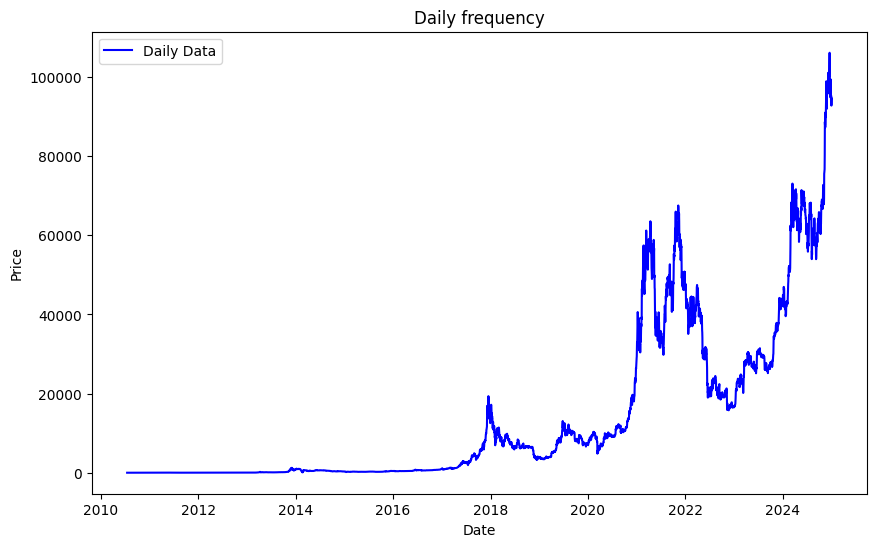

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin.index, bitcoin['Price'], label='Daily Data', color='blue')
plt.title('Daily frequency')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

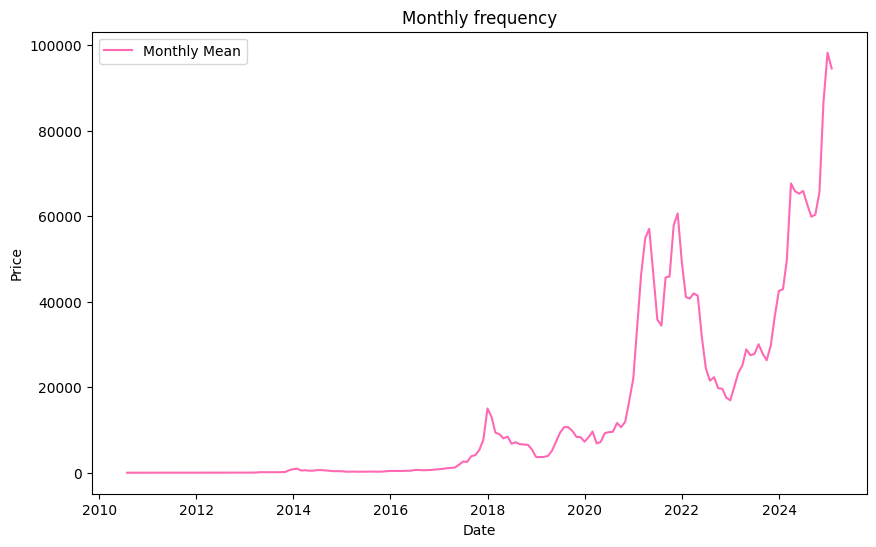

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Price'], label='Monthly Mean', color='hotpink')
plt.title('Monthly frequency')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

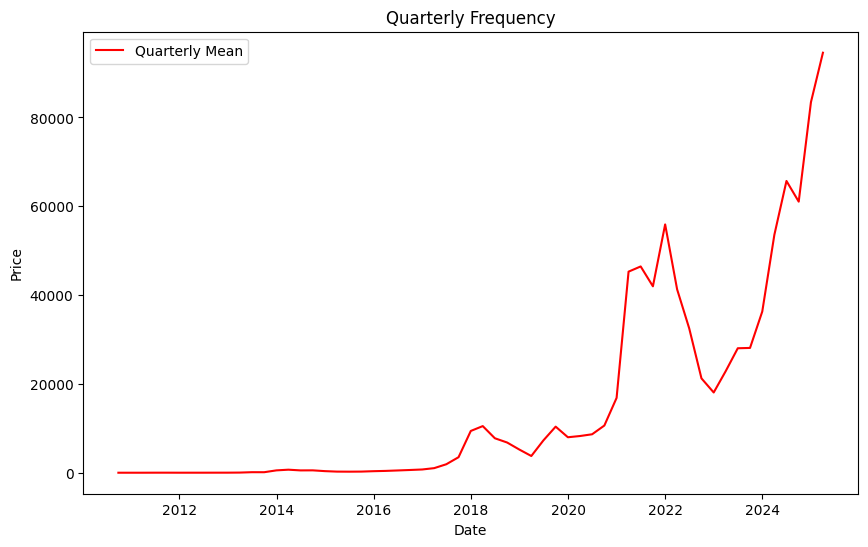

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df_quarterly.index, df_quarterly['Price'], label='Quarterly Mean', color='red')
plt.title('Quarterly Frequency')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

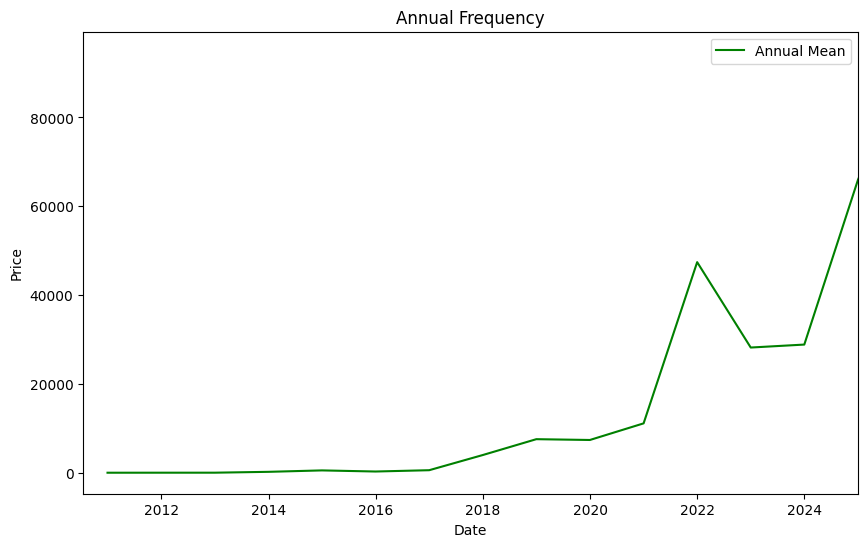

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df_annual.index, df_annual['Price'], label='Annual Mean', color='green')
plt.title('Annual Frequency')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xlim(bitcoin.index.min(), bitcoin.index.max())  # Set x-axis limits
plt.show()